*   Предсказывать будем значение popularity (задача регрессии).
*   Метрика: R2_score
*   Кросс-валидация на 10 частей с перемешиванием выборки, random_state=0

Ссылка на датасет: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv



In [ ]:
import pandas as pd # для фреймов данных
import numpy as np # для массивов и математических функций

%matplotlib inline
import matplotlib.pyplot as plt # для построения

import warnings
warnings.filterwarnings('ignore') # игнор любых предупреждений

In [ ]:
movies_df = pd.read_csv('/content/drive/MyDrive/University/Machine Learning/Project/tmdb_5000_movies.csv')

# Анализ данных

In [ ]:
movies_df.sample(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1939,25000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.bloodrayne-themovie.com/main/index....,168705,"[{""id"": 3133, ""name"": ""vampire""}, {""id"": 9259,...",en,BloodRayne,"In eighteenth century Romania, Rayne, a dhampi...",7.008216,"[{""name"": ""Boll KG"", ""id"": 15127}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-10-22,2405420,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Revenge never tasted so sweet.,BloodRayne,3.5,118
1039,46000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",NaN,113464,[],en,Inchon,A noisy and absurd re-telling of the great 195...,0.146783,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}, ...",1981-05-04,5200000,140.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,LOVE. DESTINY. HEROES. War Changes Everything.,Inchon,6.5,2
1028,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,593,"[{""id"": 1228, ""name"": ""1970s""}, {""id"": 1565, ""...",ru,Солярис,Ground control has been receiving strange tran...,24.132271,"[{""name"": ""Mosfilm"", ""id"": 5120}, {""name"": ""Cr...","[{""iso_3166_1"": ""RU"", ""name"": ""Russia""}]",1972-03-20,0,167.0,"[{""iso_639_1"": ""ru"", ""name"": ""P\u0443\u0441\u0...",Released,NaN,Solaris,7.7,357


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies_df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [ ]:
movies_df.sort_values(by='popularity',ascending=False)[:5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427


In [ ]:
movies_df.sort_values(by='popularity',ascending=True)[:5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0
3361,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 28, ""nam...",NaN,77156,[],en,Alien Zone,A man who is having an affair with a married w...,0.000372,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1978-11-22,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't you dare go in there!,Alien Zone,4.0,3
4727,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,65448,"[{""id"": 378, ""name"": ""prison""}, {""id"": 209476,...",en,Penitentiary,A hitchhiker named Martel Gordone gets in a fi...,0.001117,[],[],1979-12-01,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"There's only one way out, and 100 fools stand ...",Penitentiary,4.9,8
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0
4625,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,426067,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],[],1990-01-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot spot where Satan's waitin'.,Midnight Cabaret,0.0,0


In [ ]:
movies_df.sort_values(by='vote_average', ascending = False)[:5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,9.5,2


In [ ]:
movies_df['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
id       2
cs       2
ar       2
ro       2
ta       2
is       1
el       1
nb       1
no       1
tr       1
af       1
sl       1
ky       1
pl       1
hu       1
xx       1
vi       1
ps       1
te       1
Name: original_language, dtype: int64

# Очистка

In [ ]:
features_df = movies_df[['budget','genres','original_language','runtime','vote_average','vote_count']]
labels_df = movies_df['popularity']

In [ ]:
features_df = features_df.dropna() # убираем любые строки с нулевыми значениями

In [ ]:
features_df = features_df[features_df['vote_count'] >= 10] # учитываем 10 или более проголосовавших

In [ ]:
features_df = features_df[features_df['runtime'] != 0.0] # убираем любые значения с нулевым временем выполнения

In [ ]:
labels_df = labels_df[features_df.index] # фрейм данных меток включал только строки фрейма данных новых функций

In [ ]:
features_df.describe()

,budget,runtime,vote_average,vote_count
count,4.386000e+03,4386.000000,4386.000000,4386.000000
mean,3.168441e+07,108.554492,6.228659,755.455084
std,4.164199e+07,20.705083,0.891691,1272.838558
min,0.000000e+00,25.000000,1.900000,10.000000
25%,2.917508e+06,95.000000,5.700000,84.000000
50%,1.700000e+07,105.000000,6.300000,290.000000
75%,4.200000e+07,119.000000,6.800000,831.750000
max,3.800000e+08,338.000000,8.500000,13752.000000


# Исследовательский анализ данных

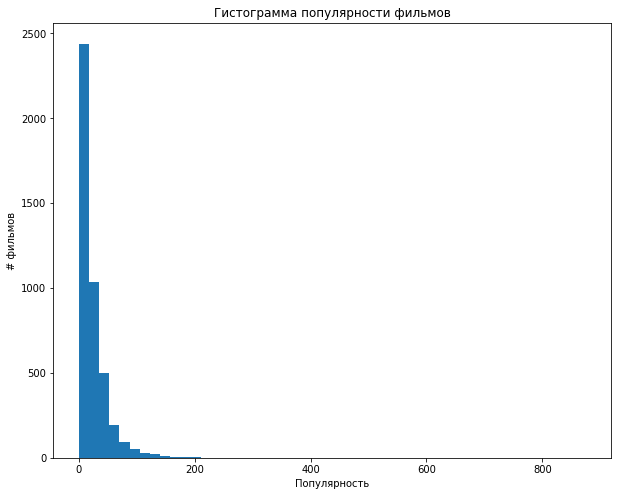

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(labels_df.values,bins=50)
plt.title('Гистограмма популярности фильмов')
plt.xlabel('Популярность')
plt.ylabel('# фильмов')
plt.show()

In [ ]:
labels_df.skew()

9.735602382531894

In [ ]:
# метод журнала
labels_df = np.log(labels_df)

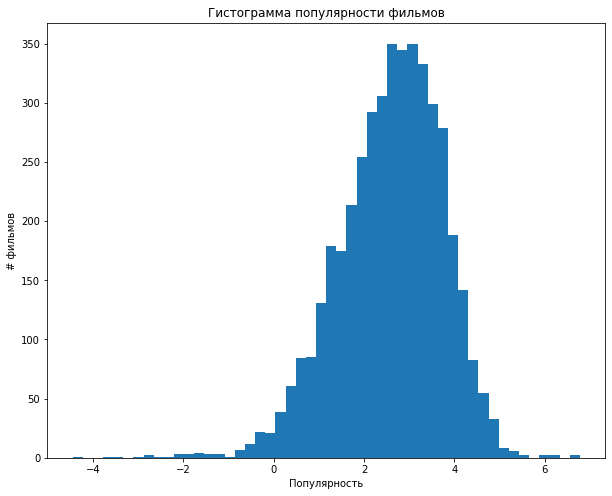

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(labels_df.values,bins=50)
plt.title('Гистограмма популярности фильмов')
plt.xlabel('Популярность')
plt.ylabel('# фильмов')
plt.show()

In [ ]:
print('Скачок популярности:', labels_df.skew())

Скачок популярности: -0.618416591551565


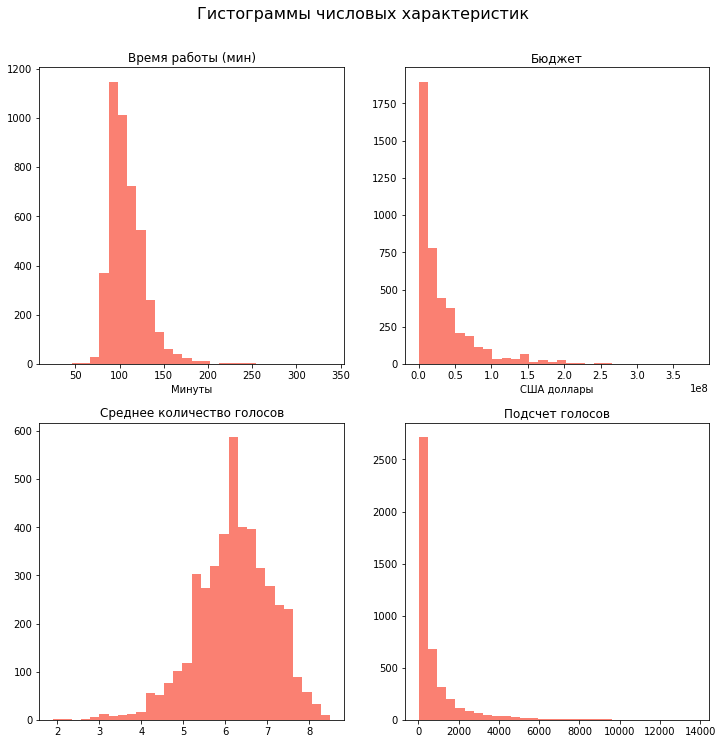

In [ ]:
plt.rcParams['figure.figsize'] = 12, 12
fig, axs = plt.subplots(2,2)
fig.suptitle('Гистограммы числовых характеристик',y=0.95,fontsize=16)

axs[0,1].hist(features_df['budget'].values,bins=30,color='salmon')
axs[0,1].set_title('Бюджет')
axs[0,1].set(xlabel='США доллары')
axs[0,0].hist(features_df['runtime'].values,bins=30,color='salmon')
axs[0,0].set_title('Время работы (мин)')
axs[0,0].set(xlabel='Минуты')
axs[1,0].hist(features_df['vote_average'].values,bins=30,color='salmon')
axs[1,0].set_title('Среднее количество голосов')
axs[1,1].hist(features_df['vote_count'].values,bins=30,color='salmon')
axs[1,1].set_title('Подсчет голосов')
plt.show()

In [ ]:
# подсчет голосов и бюджет искажены

print('Смещение подсчета голосов:', features_df['vote_count'].skew())
print('Отклонение среднего числа голосов:', features_df['vote_average'].skew())
print('Искажение времени выполнения:', features_df['runtime'].skew())
print('Отклонение бюджета:', features_df['budget'].skew())

Смещение подсчета голосов: 3.6824897542915105
Отклонение среднего числа голосов: -0.48020726663352165
Искажение времени выполнения: 1.8794578310791243
Отклонение бюджета: 2.3352522668340905


In [ ]:
# преобразование журнала для подсчета голосов и преобразование квадратного корня в бюджет. 
# связано с тем, что бюджет содержит нулевые значения, и их журнал даст нам неопределенные значения.

features_df['vote_count'] = np.log(features_df['vote_count'].values)
features_df['budget'] = np.sqrt(features_df['budget'].values)

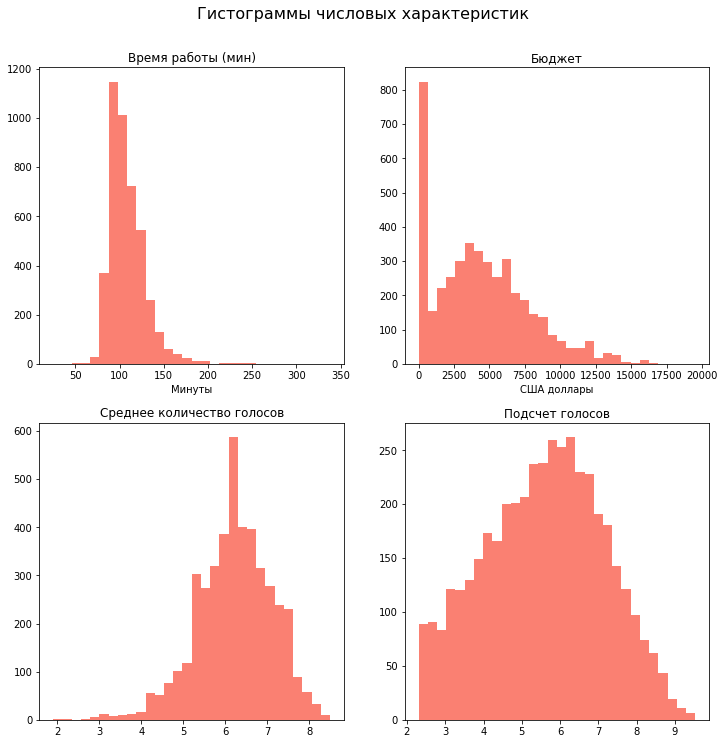

In [ ]:
plt.rcParams['figure.figsize'] = 12, 12
fig, axs = plt.subplots(2,2)
fig.suptitle('Гистограммы числовых характеристик',y=0.95,fontsize=16)

axs[0,1].hist(features_df['budget'].values,bins=30,color='salmon')
axs[0,1].set_title('Бюджет')
axs[0,1].set(xlabel='США доллары')
axs[0,0].hist(features_df['runtime'].values,bins=30,color='salmon')
axs[0,0].set_title('Время работы (мин)')
axs[0,0].set(xlabel='Минуты')
axs[1,0].hist(features_df['vote_average'].values,bins=30,color='salmon')
axs[1,0].set_title('Среднее количество голосов')
axs[1,1].hist(features_df['vote_count'].values,bins=30,color='salmon')
axs[1,1].set_title('Подсчет голосов')
plt.show()

In [ ]:
print(features_df['vote_count'].skew())
print(features_df['vote_average'].skew())
print(features_df['runtime'].skew())
print(features_df['budget'].skew())

-0.08443487156158652
-0.48020726663352165
1.8794578310791243
0.6566060835465133


<Figure size 864x864 with 0 Axes>

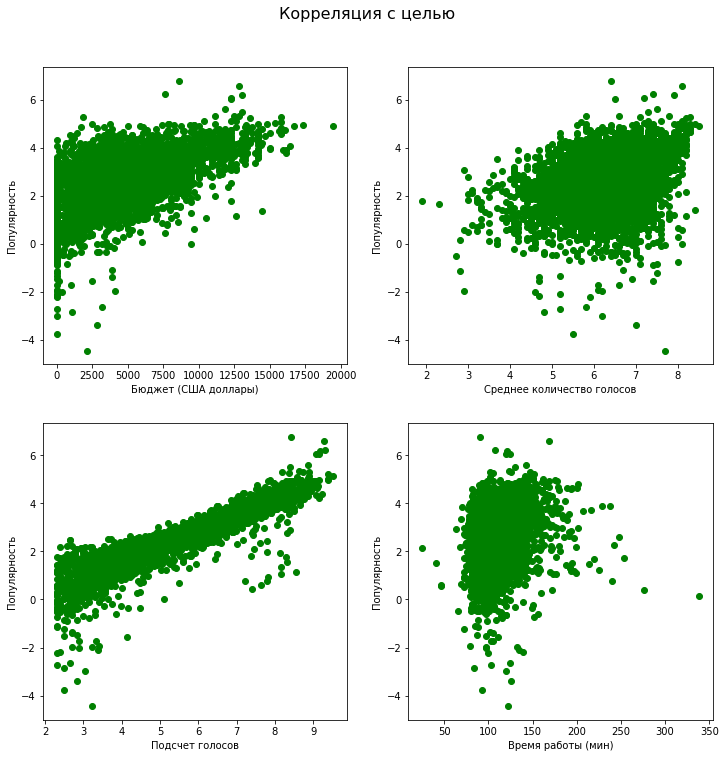

In [ ]:
# корреляция между переменными на диаграмме рассеяния

plt.figure(figsize=(12,12))

fig, axs = plt.subplots(2,2)
fig.suptitle('Корреляция с целью',y=0.95,fontsize=16)
axs[0,1].scatter(features_df['vote_average'].values, labels_df.values,color='green')
axs[0,1].set(xlabel='Среднее количество голосов',ylabel='Популярность')
axs[0,0].scatter(features_df['budget'].values, labels_df.values,color='green')
axs[0,0].set(xlabel='Бюджет (США доллары)',ylabel='Популярность')
axs[1,0].scatter(features_df['vote_count'].values, labels_df.values,color='green')
axs[1,0].set(xlabel='Подсчет голосов',ylabel='Популярность')
axs[1,1].scatter(features_df['runtime'].values, labels_df.values,color='green')
axs[1,1].set(xlabel='Время работы (мин)',ylabel='Популярность')
plt.show()

In [ ]:
# коэффициенты корреляции

corr_matrix = pd.concat([features_df, labels_df],axis=1).corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity      1.000000
vote_count      0.916572
budget          0.581840
vote_average    0.322951
runtime         0.211157
Name: popularity, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33e82aa310>,
      dtype=object)

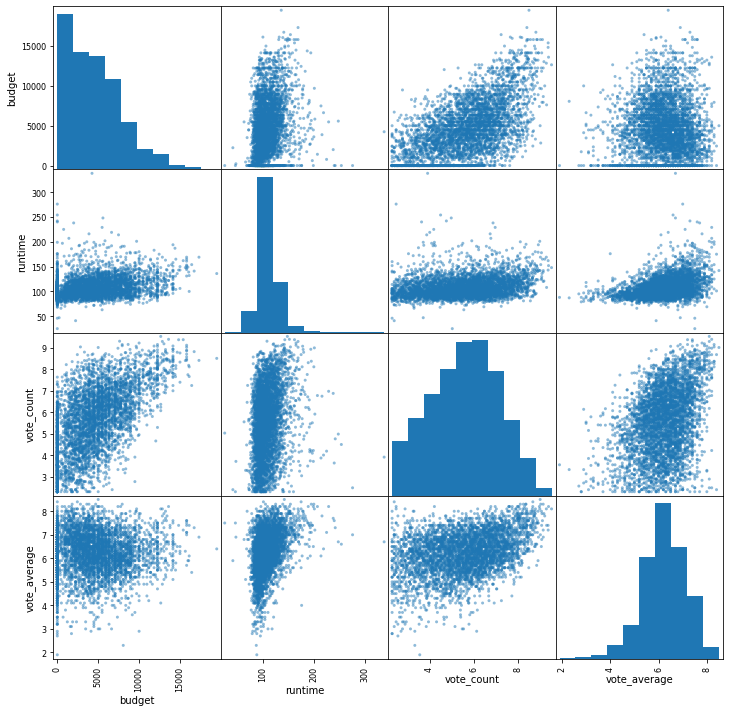

In [ ]:
# соотношение линейной регрессии о линейности и гомоскедастичности

from pandas.plotting import scatter_matrix

scatter_matrix(features_df[['budget','runtime','vote_count','vote_average']], figsize=(12,12))

In [ ]:
# посмотрим на коэффициенты корреляции

features_df.corr()

,budget,runtime,vote_average,vote_count
budget,1.000000,0.266015,0.013694,0.618584
runtime,0.266015,1.000000,0.387662,0.228007
vote_average,0.013694,0.387662,1.000000,0.371979
vote_count,0.618584,0.228007,0.371979,1.000000


# Функциональная инженерия

In [ ]:
# кодирование языка

features_df['Language'] = features_df['original_language'].apply(lambda x: 1 if 'en' == x else 0)

In [ ]:
# кодировка жанра

genre_list = ['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation',
 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music']

In [ ]:
# создание столбца для каждого жанра и закодирование его

for genre in genre_list:
  features_df[genre] = features_df['genres'].apply(lambda x: 1 if genre in x else 0)

In [ ]:
features_df.describe()

,budget,runtime,vote_average,vote_count,Language,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music
count,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000
mean,4434.803367,108.554492,6.228659,5.577760,0.941860,0.253078,0.175559,0.094847,0.117647,0.151619,0.475604,0.276106,0.050388,0.107843,0.017100,0.365481,0.187415,0.110807,0.075467,0.042180,0.031008,0.036936
std,3466.939009,20.705083,0.891691,1.553504,0.234034,0.434825,0.380488,0.293037,0.322226,0.358692,0.499461,0.447121,0.218768,0.310218,0.129658,0.481620,0.390288,0.313929,0.264174,0.201022,0.173358,0.188625
min,0.000000,25.000000,1.900000,2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1708.054848,95.000000,5.700000,4.430817,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4123.105626,105.000000,6.300000,5.669881,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6480.740698,119.000000,6.800000,6.723532,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19493.588690,338.000000,8.500000,9.528940,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# корреляция стобцов с популярностью

corr_matrix = pd.concat([features_df, labels_df],axis=1).corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity         1.000000
vote_count         0.916572
budget             0.581840
vote_average       0.322951
runtime            0.211157
Adventure          0.208353
Action             0.163681
Fantasy            0.163553
Science Fiction    0.139303
Language           0.130008
Animation          0.127801
Thriller           0.105541
Family             0.080291
Mystery            0.064469
Crime              0.060577
War                0.015952
Western           -0.006693
Horror            -0.008235
History           -0.028107
Music             -0.060888
Comedy            -0.088885
Romance           -0.102403
Drama             -0.143354
Name: popularity, dtype: float64

In [ ]:
# удаление закодированных стобцов

features_df = features_df.drop(columns=['original_language','genres'])

In [ ]:
# масштабирование функции

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

features_df_scaled = pd.DataFrame(scaler.fit_transform(features_df),index=features_df.index, columns=features_df.columns)

In [ ]:
features_df_scaled.head()

,budget,runtime,vote_average,vote_count,Language,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music
0,0.789737,0.437700,0.803030,0.978816,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.888523,0.460064,0.757576,0.845412,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.802955,0.392971,0.666667,0.844363,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.811107,0.447284,0.863636,0.942952,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827170,0.341853,0.636364,0.741518,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Линейная регрессия лассо

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
features_df.describe()

,budget,runtime,vote_average,vote_count,Language,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music
count,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000
mean,4434.803367,108.554492,6.228659,5.577760,0.941860,0.253078,0.175559,0.094847,0.117647,0.151619,0.475604,0.276106,0.050388,0.107843,0.017100,0.365481,0.187415,0.110807,0.075467,0.042180,0.031008,0.036936
std,3466.939009,20.705083,0.891691,1.553504,0.234034,0.434825,0.380488,0.293037,0.322226,0.358692,0.499461,0.447121,0.218768,0.310218,0.129658,0.481620,0.390288,0.313929,0.264174,0.201022,0.173358,0.188625
min,0.000000,25.000000,1.900000,2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1708.054848,95.000000,5.700000,4.430817,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4123.105626,105.000000,6.300000,5.669881,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6480.740698,119.000000,6.800000,6.723532,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19493.588690,338.000000,8.500000,9.528940,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

lasso = linear_model.Lasso()
linear_pred = cross_val_predict(lasso, features_df, labels_df, cv=kf)
print("Оценки с перекрестной проверкой:", linear_pred)

Оценки с перекрестной проверкой: [4.70855046 5.12355381 4.80946533 ... 1.70581723 1.80567841 1.72850639]


In [ ]:
# чем ближе к 1 - тем лучше

from sklearn.metrics import r2_score
print('Результат линейной регрессии:', r2_score(labels_df, linear_pred))

Результат линейной регрессии: 0.33968807063406725


# Инные регрессии

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extraTrees = ExtraTreesRegressor()
tress_pred = cross_val_predict(extraTrees, features_df, labels_df, cv=kf)
print('Результат регрессии дополнительных деревьев:', r2_score(labels_df, tress_pred))

Результат регрессии дополнительных деревьев: 0.8118122503818515


In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor()
forest_pred = cross_val_predict(randomForest, features_df, labels_df, cv=kf)
print('Результат регрессии случайный лес:', r2_score(labels_df, forest_pred))

Результат регрессии случайный лес: 0.8269817806455788


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoost = AdaBoostRegressor()
ada_pred = cross_val_predict(AdaBoost, features_df, labels_df, cv=kf)
print('Результат регрессии Ада Бустинг:', r2_score(labels_df, ada_pred))

Результат регрессии Ада Бустинг: 0.6855871098746871


In [ ]:
from sklearn.ensemble import BaggingRegressor

Bagging = BaggingRegressor()
bagging_pred = cross_val_predict(Bagging, features_df, labels_df, cv=kf)
print('Результат регрессии "Упаковка":', r2_score(labels_df, bagging_pred))

Результат регрессии "Упаковка": 0.8098765629969684


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GradientBoosting = GradientBoostingRegressor()
gradient_pred = cross_val_predict(GradientBoosting, features_df, labels_df, cv=kf)
print('Результат регрессии повышение градиента:', r2_score(labels_df, gradient_pred))

Результат регрессии повышение градиента: 0.84296259933079


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge_pred = cross_val_predict(ridge, features_df, labels_df, cv=kf)
print('Результат регрессии Ridge:', r2_score(labels_df, ridge_pred))

Результат регрессии Ridge: 0.8415399468077756


In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor()
xgbr_pred = cross_val_predict(XGBR, features_df, labels_df, cv=kf)
print('Результат регрессии Ridge:', r2_score(labels_df, xgbr_pred))

[05:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# Нейронка

In [ ]:
#import tensorflow as tf
#import tensorflow.keras.layers as L
#from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
#def get_tf_model():
#    model = tf.keras.Sequential([
#        L.Input(shape=(features_df.shape[1])),
#        L.Dense(250, activation='relu'),
#        L.BatchNormalization(),
#        L.Dense(200, activation='relu'),
#        L.BatchNormalization(),
#        L.Dense(200, activation='relu'),
#        L.BatchNormalization(),
#        L.Dense(1)
#    ])

#    model.compile(
#        optimizer='adam',
#        loss = 'mse',
#        metrics=['accuracy','mse']
#    )
    
#    return model

In [ ]:
#get_tf_model().summary()

In [ ]:
#keras = KerasRegressor(build_fn = get_tf_model, epochs = 50, verbose = 1, batch_size = 100)
#keras_pred = cross_val_predict(keras, features_df, labels_df, cv=kf)
#print('Результат регрессии нейросети:', r2_score(labels_df, keras_pred))

# Улучшение

In [ ]:
# попробуем улучшить некоторые из этих результатов
# поиск по сетке показывает, какие комбинации гиперпараметров обеспечивают наилучшие результаты, 
# пробуя множество различных комбинаций

from sklearn.model_selection import GridSearchCV #RandomSearch

# Введите модель, параметры настроек и возвращение лучшуей модели
def grid_search(model,params):
  search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
  search.fit(features_df, labels_df)
  return search.best_estimator_

In [ ]:
XGBR.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
# Выберем несколько вариантов и применим поиск по сетке
param_grid = [
              {'alpha': [0.1,0.05,0.01,0.005] , #либо диапозон (0.1 - 0.005)
               "fit_intercept": [True, False], 
               'normalize': [True, False],
               "tol": [0.0005,.0001,0.00005]}
]

xgbr_grid = grid_search(XGBR, param_grid)

xgbr_grid.get_params() # это будут наши новые параметры

[05:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'alpha': 0.1,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'fit_intercept': True,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'normalize': True,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tol': 0.0005,
 'verbosity': 1}

In [ ]:
XGBR = XGBRegressor(
 alpha = 0.5, # либо подбор руками подобных значений тут
 copy_X = True,
 fit_intercept = True, 
 max_iter = 100,
 normalize = True,
 positive = False,
 precompute = False,
 random_state = 0,
 selection = 'cyclic',
 tol = 0.05,
 warm_start = False)
xgbr_pred = cross_val_predict(XGBR, features_df, labels_df, cv=kf)
print('Результат улучшенной регрессии:', r2_score(labels_df, xgbr_pred))

[05:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re